In [34]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt

In [2]:
m = 1
K = 1
a = 1

Py = np.array([[0, 0], [0, 1]])
P1 = np.array([[3/4, np.sqrt(3)/4], [np.sqrt(3)/4, 1/4]])
P2 = np.array([[3/4, -np.sqrt(3)/4], [-np.sqrt(3)/4, 1/4]])

y = np.array([0, 1])
# these have nothing to do with the reciprocal lattice vectors
b1_hat = np.array([np.sqrt(3)/2, 0.5])
b2_hat = np.array([-np.sqrt(3)/2, 0.5])
k = np.array([0, 1])

A11 = -(Py + P1 + P2)
A12 = Py*np.exp(1j*k@y*a) + P1*np.exp(-1j*k@b1_hat*a) + P2*np.exp(-1j*k@b2_hat*a)
A21 = np.conjugate(A12)
A22 = -(Py + P1 + P2)

A = -K/m * np.block([
    [A11, A12],
    [A21, A22]
])

print(np.array_str(A, precision=1, suppress_small=True))


[[ 1.5-0.j   0. -0.j  -1.3+0.7j -0. +0.j ]
 [ 0. -0.j   1.5-0.j  -0. +0.j  -1. -0.6j]
 [-1.3-0.7j  0. +0.j   1.5-0.j   0. -0.j ]
 [ 0. +0.j  -1. +0.6j  0. -0.j   1.5-0.j ]]


In [8]:
def dispesion(k):
    A11 = -(Py + P1 + P2)
    A12 = Py*np.exp(1j*k@y*a) + P1*np.exp(-1j*k@b1_hat*a) + P2*np.exp(-1j*k@b2_hat*a)
    A21 = np.conjugate(A12)
    A22 = -(Py + P1 + P2)

    A = -K/m * np.block([
        [A11, A12],
        [A21, A22]
    ])

    w, v = eig(A)
    return w, v

In [80]:
N1 = 100
N2 = 100

ucell_vol = 1.5*np.sqrt(3)*(a**3)

b1 = 2*np.pi/ucell_vol * a**2 * np.array([3/2, -np.sqrt(3)/2])
b2 = 2*np.pi/ucell_vol * a**2 * np.array([-3/2, -np.sqrt(3)/2])

m1 = np.linspace(-N1/2, N1/2-1, N1)
m2 = np.linspace(-N2/2, N2/2-1, N2)

M1, M2 = np.meshgrid(m1, m2)

k_mat = np.outer(M1,1/N1*b1)+np.outer(M2,1/N2*b2)
k_mat = k_mat.reshape((N1,N2,2))

w = np.zeros((N1, N2, 4))

In [81]:
for i in range(k_mat.shape[0]):
    for j in range(k_mat.shape[1]):
        w[i,j,:], _ = dispesion(k_mat[i,j,:])

/tmp/ipykernel_1128/3164490241.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  w[i,j,:], _ = dispesion(k_mat[i,j,:])


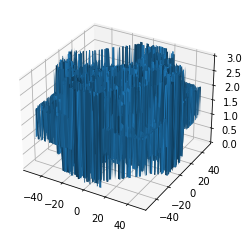

In [88]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(M1, M2, w[:,:,2])

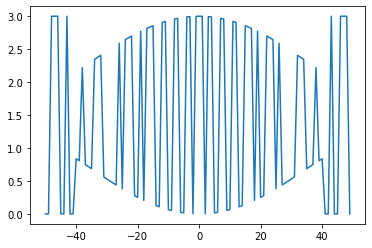

In [91]:
plt.plot(m2, w[50, :, 2])

In [ ]:
w[50,50,:]

array([3.00000000e+00, 2.81973195e-33, 3.00000000e+00, 2.81973195e-33])

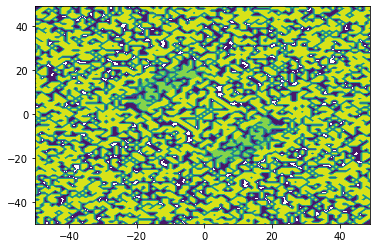

In [99]:
plt.contourf(M1, M2, w[:,:,0])

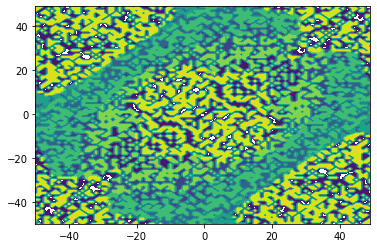

In [96]:
plt.contourf(M1, M2, w[:,:,1])

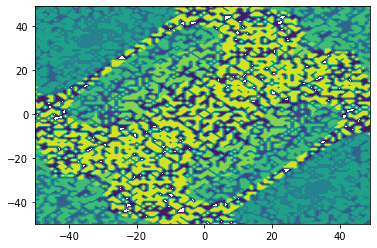

In [97]:
plt.contourf(M1, M2, w[:,:,2])

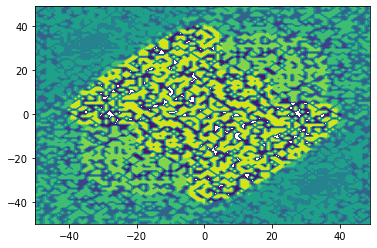

In [98]:
plt.contourf(M1, M2, w[:,:,3])

In [128]:
vol = N1*N2*a**2
beta = np.linspace(1, 100, 100)
w_beta = w[..., None] * beta
energy_density = np.repeat(w[..., None], 100, axis=3)/vol*(0.5 + 1/(np.exp(w_beta) - 1))

/tmp/ipykernel_1128/1897060823.py:4: RuntimeWarning: divide by zero encountered in true_divide
  energy_density = np.repeat(w[..., None], 100, axis=3)/vol*(0.5 + 1/(np.exp(w_beta) - 1))


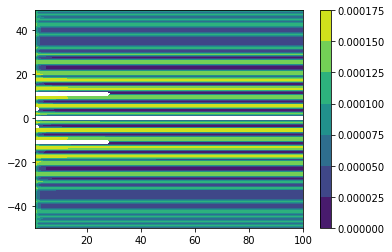

In [155]:
fig = plt.contourf(beta, m1, energy_density[:,50,1,:]) 
plt.colorbar()
fig

In [146]:
x = np.array([-1,0,1])
y = np.array([1, 2, 3])
X, Y = np.meshgrid(x,y)
X[0,2]

1

In [148]:
energy_density[:,50,1,:][50]

array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf])